# Plotting Tool For Fiber Strand Tensile Tests

This tool is for plotting the stress strain curves for tensile tests of carbon fiber strands.

## Importing the necessary packages and defining the work directory 

In the next cell, enter the path for the working directory and choose wanted data files.
The data files might have any extension but have to be in 'csv' format. The first row should contain the names of the data columns.
If not all data files in the directroy need to be plotted, choose the wanted file, then press 'Update file list'.

In [17]:
#%matplotlib inline
%matplotlib widget
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
import os
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual, Button, HBox, Layout,VBox
import ipywidgets as widgets
from IPython.display import display, Javascript
import math
#from sklearn.linear_model import LinearRegression
import csv
from scipy.signal import savgol_filter
#Locale settings
import locale
# Set to German locale to get comma decimal separater
#locale.setlocale(locale.LC_NUMERIC, "de_DE")
#widgets text style
style = {'description_width': 'initial'}

def get_file_list(file_path, section):
    global file_list
    global file_path0
    global section0
    
    file_path0 = file_path
    section0 = section
    # get file list
    file_list = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    #file_list = ['{0}/{1}'.format(file_path, f) for f in listdir(file_path) if isfile(join(file_path, f))]
    file_list = np.sort(file_list)
    if file_list[0] == '.DS_Store':
        file_list = np.delete(file_list, 0)      
        


interact(get_file_list,
         file_path = widgets.Text(value='data/FSZ-Q95-90_1/plots_data', description='File path', style = style),
         section = widgets.FloatText(value=1.81, description='Sectional Area [mm2]', style = style)
        )    


# def select_files(file_list):
def select_files(file_list):
    checkboxes = [widgets.Checkbox(value=False, description=label, style = style) for label in file_list]
    output = widgets.VBox(children=checkboxes)
    display(output)
    return(checkboxes)

# update
def update_list(t):
    global file_list
    file_list = []
    for i in range(0, len(checkboxes)):
        if checkboxes[i].value == True:
            file_list = file_list + [checkboxes[i].description]
    print(file_list)
    
checkboxes = select_files(file_list)        
button = Button(description="Update file list")
display(button)
button.on_click(update_list)

interactive(children=(Text(value='data/FSZ-Q95-90_1/plots_data', description='File path', style=DescriptionSty…

Button(description='Update file list', style=ButtonStyle())

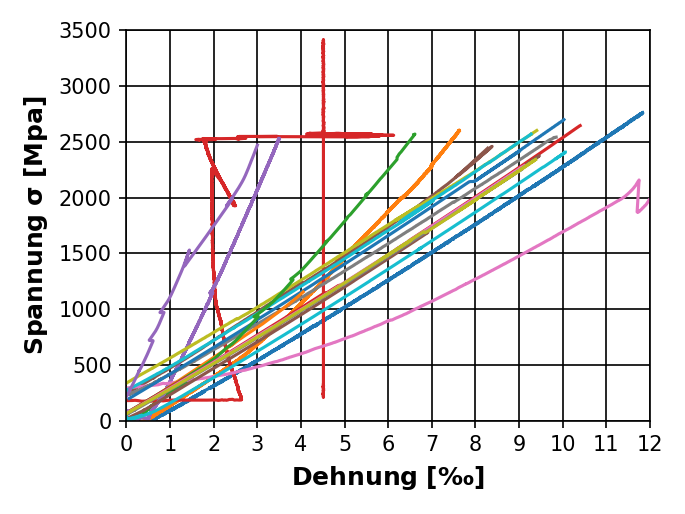

In [18]:
plt.close()
fig1, ax1 = plt.subplots(1, 1,figsize=(8/1.75, 6/1.75), dpi=150)
#formatting ax1
1,75
x_label = r'$\mathbf{Dehnung}$' + r" $\mathbf{{[‰]}}$"
y_label = r'$\mathbf{Spannung}$ $\mathbf{\sigma}$'  + r" $\mathbf{{[Mpa]}}$"
ax1.set_xlabel(x_label, fontsize=12)
ax1.set_ylabel(y_label, fontsize=12)
ax1.grid(visible='Yes', which='major', axis='both', color='black')

ax1.set_xticks(np.arange(0, 12+1/2, 1), fontsize=14)
ax1.set_yticks(np.arange(0, 3500+500/2, 500), fontsize=14)
ax1.set_xlim([0,12]) 
ax1.set_ylim([0,3500])
plt.tight_layout() 
for i in range(0,len(file_list)):
    f = file_path0 + '/' + file_list[i]
    plot_data = np.loadtxt(f)
    ax1.plot(plot_data[:,0],plot_data[:,1])
    plot_name = file_path0 + '/' + 'gesamte_serie.pdf'
    fig1.savefig(plot_name, bbox_inches='tight')



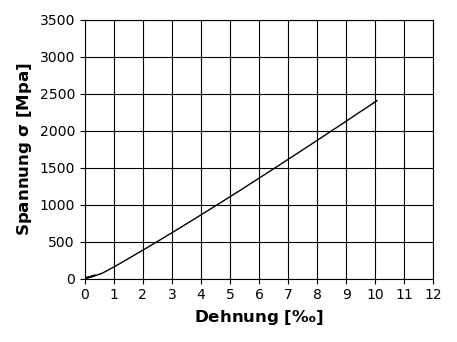

In [19]:
for i in range(0,len(file_list)):
    plt.close()
    fig1, ax1 = plt.subplots(1, 1,figsize=(8/1.75, 6/1.75))
    #formatting ax1
    x_label = r'$\mathbf{Dehnung}$' + r" $\mathbf{{[‰]}}$"
    y_label = r'$\mathbf{Spannung}$ $\mathbf{\sigma}$'  + r" $\mathbf{{[Mpa]}}$"
    ax1.set_xlabel(x_label, fontsize=12)
    ax1.set_ylabel(y_label, fontsize=12)
    ax1.grid(visible='Yes', which='major', axis='both', color='black')

    ax1.set_xticks(np.arange(0, 12+1/2, 1), fontsize=14)
    ax1.set_yticks(np.arange(0, 3500+500/2, 500), fontsize=14)
    ax1.set_xlim([0,12]) 
    ax1.set_ylim([0,3500])
    plt.tight_layout() 
    f = file_path0 + '/' + file_list[i]
    plot_data = np.loadtxt(f)
    ax1.plot(plot_data[:,0],plot_data[:,1], color='black',linewidth=1)

    plt.tight_layout()
    extent = ax1.get_tightbbox(fig1.canvas.get_renderer()).transformed(fig1.dpi_scale_trans.inverted()) 
    extent.y1 = extent.y1 + 0.1
    extent.x1 = extent.x1 + 0.1
    plot_name = os.path.splitext(f)[0] + '.pdf'
    fig1.savefig(plot_name, dpi=1200, bbox_inches=extent)